In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
arquivo = "testsmells_202601061427.csv"  # Substitua pelo nome do seu arquivo
dados = pd.read_csv(arquivo)


# Dicionário de mapeamento das siglas
siglas = {
    "Assertion Roulette": "AR",
    "Conditional Test Logic": "CTL",
    "Duplicate Assert": "DA",
    "Empty Test": "ET",
    "Exception Handling": "EH",
    "Ignored Test": "IT",
    "Magic Number": "MN",
    "Print Statment Fixture": "PSF",
    "Resource Optimism": "RO",
    "Sensitive Equality": "SE",
    "Sleepy Fixture": "SF",
    "Test Without Description": "TWD",
    "Unknown Test": "UT",
    "Verbose Test": "VT"
}

# Substituir os nomes dos Test Smells pelas siglas
dados['testsmell'] = dados['testsmell'].replace(siglas)

dados = dados.drop_duplicates()

# Verificar as primeiras linhas para garantir que foi importado corretamente
print(dados.head())

# Criar a tabela binária (1 se o testsmell está presente no path, 0 caso contrário)
tabela_binaria = pd.crosstab(dados['path'], dados['testsmell'])

print(tabela_binaria)




                                                 path testsmell
0   /home/tassio/.dnose/projects/100ms-flutter/pac...        DA
3   /home/tassio/.dnose/projects/100ms-flutter/pac...        AR
6   /home/tassio/.dnose/projects/100ms-flutter/sam...        DA
9   /home/tassio/.dnose/projects/100ms-flutter/sam...        AR
12  /home/tassio/.dnose/projects/100ms-flutter/sam...        DA
testsmell                                           AR  CTL  DA  EH  ET  IT  \
path                                                                          
/home/tassio/.dnose/projects/100ms-flutter/pack...   1    0   1   0   0   0   
/home/tassio/.dnose/projects/100ms-flutter/samp...   1    0   1   0   0   0   
/home/tassio/.dnose/projects/100ms-flutter/samp...   1    0   1   0   0   0   
/home/tassio/.dnose/projects/100ms-flutter/samp...   1    0   1   0   0   0   
/home/tassio/.dnose/projects/100ms-flutter/samp...   1    0   1   0   0   0   
...                                                 ..  ...  ..

In [6]:


# Converter para valores binários (1 se presente, 0 caso contrário)
# tabela_binaria = tabela_binaria.gt(0).astype(int)

# Calcular a matriz de coocorrência
matriz_coocorrencia2 = np.dot(tabela_binaria.T, tabela_binaria)

matriz_coocorrencia = tabela_binaria.T.dot(tabela_binaria)

# Normalizar a matriz para o intervalo de 0 a 1
matriz_coocorrencia_normalizada = matriz_coocorrencia / matriz_coocorrencia.max()

# Converter para DataFrame para facilitar a visualização
coocorrencia_df = pd.DataFrame(
    matriz_coocorrencia,
    index=tabela_binaria.columns,
    columns=tabela_binaria.columns
)

# Converter para DataFrame
coocorrencia_df_norm = pd.DataFrame(
    matriz_coocorrencia_normalizada,
    index=tabela_binaria.columns,
    columns=tabela_binaria.columns
)




# Exibir a matriz de coocorrência
print("Matriz de Coocorrência:")
print(coocorrencia_df)

# (Opcional) Salvar a matriz em um arquivo CSV
coocorrencia_df.to_csv("matriz_coocorrencia.csv")

Matriz de Coocorrência:
testsmell                  AR   CTL     DA    EH   ET   IT     MN  \
testsmell                                                           
AR                      12691  2249  10881   959   59  107   8546   
CTL                      2249  2791   2471   496   25   57   2312   
DA                      10881  2471  13136   998   60  123   8729   
EH                        959   496    998  1141   14   18    917   
ET                         59    25     60    14  433   10     53   
IT                        107    57    123    18   10  136    109   
MN                       8546  2312   8729   917   53  109  11132   
Print Statment Fixture    372   260    536   122    6   19    499   
RO                        599   231    778    94    9   21    623   
SE                       1217   384   1234   281    9    8   1092   
SF                        437   223    464   153    3   10    421   
TWD                        33     6     33     1   18    0     32   
UT        

In [7]:
# Exibir a matriz de coocorrência
print("Matriz de Coocorrência:")
print(coocorrencia_df_norm)

# (Opcional) Salvar a matriz em um arquivo CSV
coocorrencia_df_norm.to_csv("matriz_coocorrencia_norm.csv")

Matriz de Coocorrência:
testsmell                     AR       CTL        DA        EH        ET  \
testsmell                                                                  
AR                      1.000000  0.805804  0.828334  0.840491  0.136259   
CTL                     0.177212  1.000000  0.188109  0.434706  0.057737   
DA                      0.857379  0.885346  1.000000  0.874671  0.138568   
EH                      0.075565  0.177714  0.075974  1.000000  0.032333   
ET                      0.004649  0.008957  0.004568  0.012270  1.000000   
IT                      0.008431  0.020423  0.009364  0.015776  0.023095   
MN                      0.673391  0.828377  0.664510  0.803681  0.122402   
Print Statment Fixture  0.029312  0.093157  0.040804  0.106924  0.013857   
RO                      0.047199  0.082766  0.059227  0.082384  0.020785   
SE                      0.095895  0.137585  0.093940  0.246275  0.020785   
SF                      0.034434  0.079900  0.035323  0.134093  

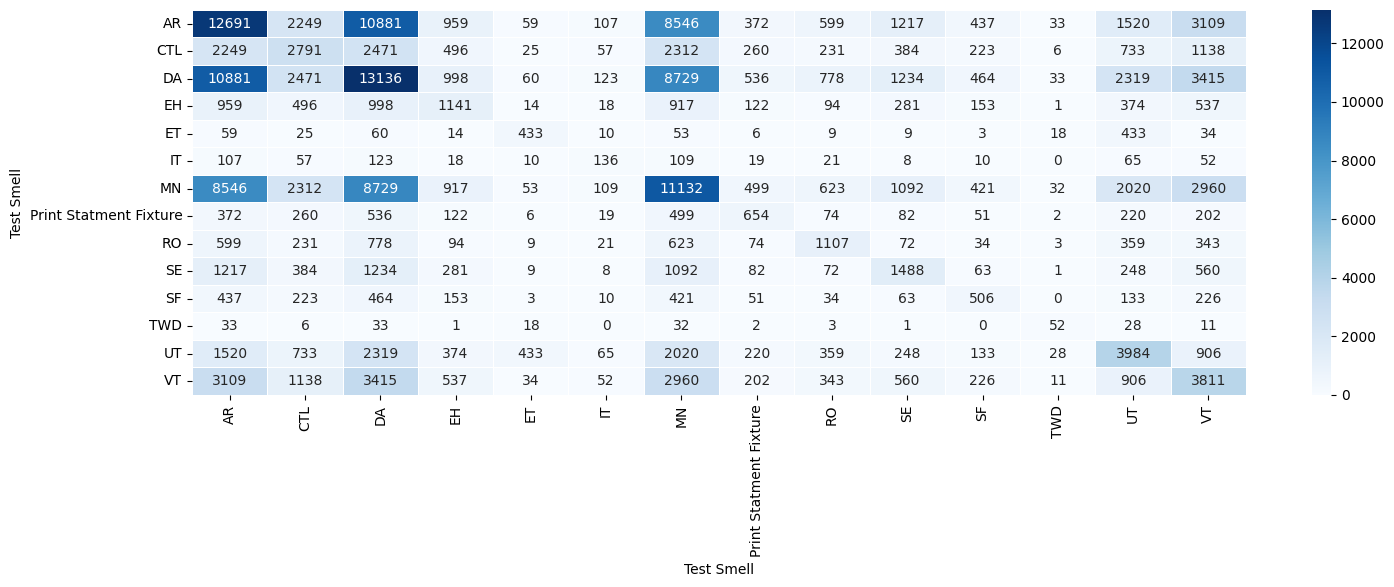

In [8]:
# Criar o gráfico de calor
plt.figure(figsize=(17, 5))
# sns.heatmap(coocorrencia_df, annot=True, fmt="d", cmap="Blues", cbar=True)

# Criar uma máscara para os valores zero
mask = coocorrencia_df == 0

sns.heatmap(
    coocorrencia_df, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    cbar=True, 
    # mask=mask, 
    linewidths=0.5,  # Para separar os valores zero
    linecolor="white"  # Cor das linhas da grade
)

# plt.title("Matriz de Coocorrência dos Test Smells")
plt.ylabel("Test Smell")
plt.xlabel("Test Smell")

# Salvar o gráfico como um arquivo PNG
plt.savefig("matriz_coocorrencia_norm.png", format="png")

plt.show()


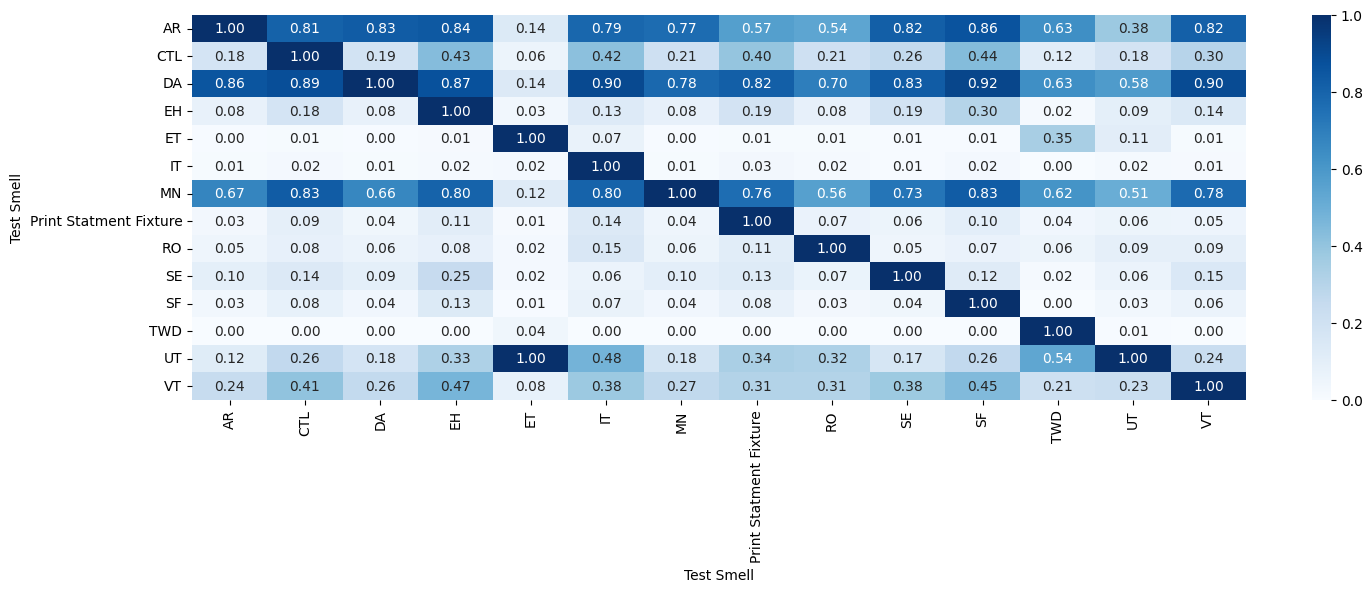

In [9]:
# Criar o gráfico de calor
plt.figure(figsize=(17, 5))
sns.heatmap(coocorrencia_df_norm, annot=True, fmt=".2f", cmap="Blues", cbar=True)
# plt.title("Matriz de Coocorrência Normalizada dos Test Smells")
plt.ylabel("Test Smell")
plt.xlabel("Test Smell")

# Salvar o gráfico como um arquivo PNG
plt.savefig("matriz_coocorrencia_norm.png", format="png")

plt.show()


In [10]:

# Salvar os dados da matriz de coocorrência normalizada em CSV
coocorrencia_df_norm.to_csv("matriz_coocorrencia_norm.csv", index=True)


In [11]:


# import pandas as pd
# import numpy as np

# # Exemplo de dados
# dados = pd.DataFrame({
#     'path': ['file1','file1', 'file1', 'file2', 'file3', 'file3', 'file3'],
#     'testsmell': ['Assertion Roulette','Assertion Roulette', 'Magic Number', 'Assertion Roulette', 'Magic Number', 'Verbose Test', 'Assertion Roulette']
# })

# import pandas as pd

# # Remover linhas duplicadas com base em todas as colunas
# dados = dados.drop_duplicates()


# # Passo 1: Criar a tabela binária (1 se o testsmell está presente no path, 0 caso contrário)
# tabela_binaria = pd.crosstab(dados['path'], dados['testsmell'])

# # Passo 2: Calcular a matriz de coocorrência
# matriz_coocorrencia = tabela_binaria.T.dot(tabela_binaria)

# # Exibir a matriz de coocorrência
# print("Matriz de Coocorrência:")
# print(matriz_coocorrencia)
